In [1]:
import sys
sys.path.append('../src/')

In [44]:
from random_graph import RandGraph
import networkx as nx
import pandas as pd
import numpy as np
import math

## Medium graph

In [9]:
entry = pd.read_csv('../data/entry_edges_medium_graph.csv', names=['head_node','tail_node'])

In [10]:
entry

,head_node,tail_node
0,2,7
1,2,8
2,4,22
3,4,23
4,4,24


In [14]:
exit_edges = pd.read_csv('../data/exit_edges_medium_graph.csv', names=['head_node','tail_node'])

In [15]:
exit_edges

,head_node,tail_node
0,6,1
1,8,3
2,9,3
3,24,5
4,19,5
5,18,5


In [16]:
core_edges = pd.read_csv('../data/core_edges_list_medium_graph.csv')

In [17]:
core_edges

,head_node,tail_node_1,tail_node_2,tail_node_3,tail_node_4,tail_node_5,tail_node_6,tail_node_7
0,6,13,10,NaN,NaN,NaN,NaN,NaN
1,7,10,8,NaN,NaN,NaN,NaN,NaN
2,8,7,9,NaN,NaN,NaN,NaN,NaN
3,9,8,17,18.0,NaN,NaN,NaN,NaN
4,10,6,7,17.0,16.0,11.0,NaN,NaN
5,11,10,17,16.0,15.0,12.0,NaN,NaN
6,12,13,11,14.0,15.0,NaN,NaN,NaN
7,13,6,12,14.0,NaN,NaN,NaN,NaN
8,14,13,12,21.0,22.0,NaN,NaN,NaN
9,15,12,11,20.0,21.0,23.0,NaN,NaN


In [20]:
entry_nodes = entry.head_node.unique().tolist()

In [21]:
entry_nodes

[2, 4]

In [22]:
exit_nodes = exit_edges.tail_node.unique().tolist()

In [23]:
exit_nodes

[1, 3, 5]

In [24]:
core_nodes = core_edges.head_node.unique().tolist()

In [25]:
core_nodes

[6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]

## Graph

In [109]:
g = nx.DiGraph()

In [110]:
edges_list = []

In [111]:
edges_list.extend([(x[1], x[2]) for x in entry.itertuples()])

In [112]:
edges_list.extend([(x[1], x[2]) for x in exit_edges.itertuples()])

## Core node capacity

In [113]:
capa = pd.read_csv('../data/core_node_capacity_medium_graph.csv', names=['node','capacity'])

In [114]:
capa['nb_cars'] = capa.capacity * 5

In [115]:
g.add_nodes_from([(x[1], {'capacity': x[3]}) for x in capa.itertuples()])

## Core edge list

In [116]:
el = []
for col in core_edges:
    if col != 'head_node':
        head_val = core_edges.head_node.values
        tail_val = core_edges[col].values
        el.extend([(x,y) for x,y in zip(head_val, tail_val)])

In [117]:
edges_list.extend([(x[0], int(x[1])) for x in el if not math.isnan(float(x[1]))])

In [118]:
g.add_edges_from(edges_list)

In [119]:
nx.set_node_attributes(g, None, 'actors')

## RandGraph

In [120]:
rg = RandGraph(actors=1000, moving=10, n_paths=10, path_depth=15)

In [121]:
rg.graph = g.copy()
rg.entry_nodes = entry_nodes
rg.exit_nodes = exit_nodes
rg.core_nodes = core_nodes

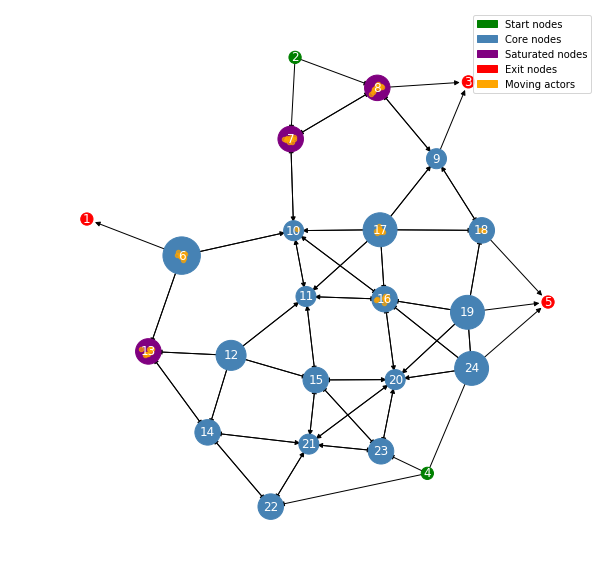

In [140]:
rg.action()
rg.plot(fig_size=(10,10))

In [142]:
for actor in rg.actors:
    print(actor)

b'4e18c526'
b'e37e8db4'
b'0774ab97'
b'bb4eb2ce'
b'888746d5'
b'4d6659cd'
b'2c2162b4'
b'28ee8d57'
b'a8385e37'
b'e108dd93'
b'c4a27d4f'
b'34886646'
b'0b320bd7'
b'8c6eca2d'
b'9900e4de'
b'1d9a9f97'
b'aecaeb2e'
b'e23095e8'
b'440302b4'
b'080203f6'
b'e1dcc378'
b'847cc1db'
b'f02e5e9a'
b'5b84fc6a'
b'821af827'
b'c81393ef'
b'bdeba660'
b'e3329829'
b'1a0aef5f'
b'6dc521f9'
b'8c2b0d3b'
b'30217cdc'
b'569fc00c'
b'9c2b5269'
b'815e44cb'
b'8f9258ac'
b'7e5024a3'
b'7f5b20b7'
b'016f8024'
b'8113799b'
b'0528984f'
b'513ded6c'
b'314461ae'
b'7ed5afac'
b'e57947b4'
b'a353264c'
b'ebed7f8c'
b'afa42729'
b'3e76d29a'
b'ba0dc96c'
b'1b00e527'
b'96a89627'
b'71515593'
b'f47dc9e4'
b'7f7cf470'
b'ad180fdf'
b'b996bcf0'
b'c3247836'
b'87977a3c'
b'13cedd05'
b'fa50d2a1'
b'694dcb17'
b'63bce37b'
b'3d3214c5'
b'9f16a19c'
b'a7ec6f65'
b'5282e87b'
b'655e3add'
b'468fd584'
b'27c41656'
b'5483a9b7'
b'70a92bbe'
b'b07622f1'
b'45752db6'
b'99f0120b'
b'df30edf3'
b'1365bcdd'
b'85504f3a'
b'0f37f9be'
b'32d96c2e'
b'fde35b2d'
b'06ed19ba'
b'cabfc8a3'
b'c8